# Simple Linear Regression

## Importing the libraries

In [100]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

## Importing the dataset

In [101]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [103]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [104]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

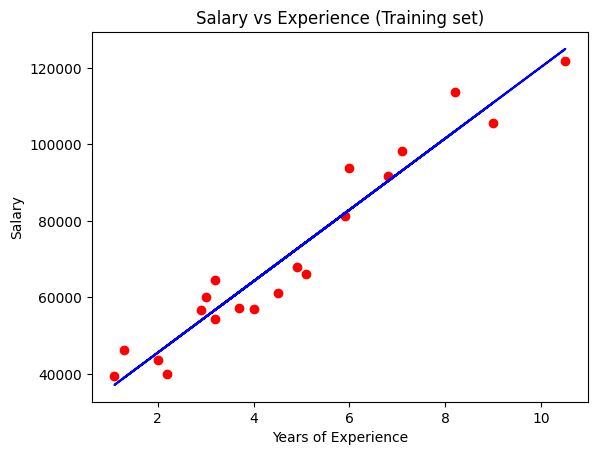

In [105]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

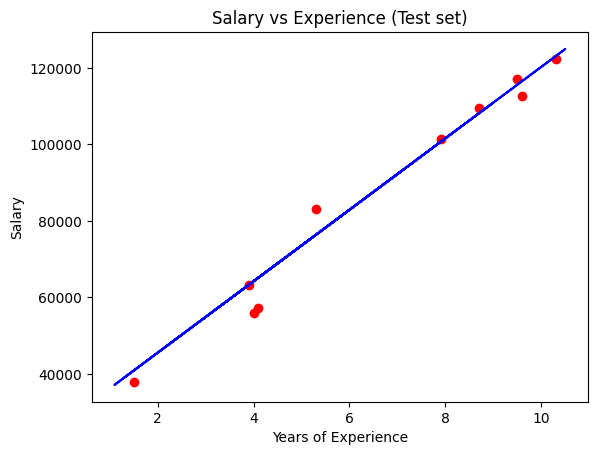

In [106]:
plt.scatter(X_test, y_test, color = 'red')
# note here using we can use X_test and y_pred too, to get the regression line
# since the regression equation is same
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

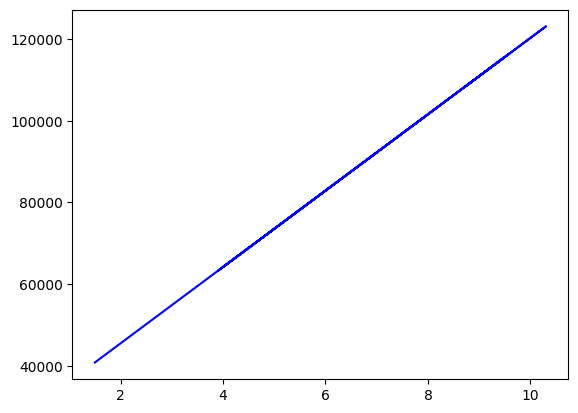

In [107]:
# line will be same since equation used is same
plt.plot(X_test, y_pred, color = 'blue')
plt.show()

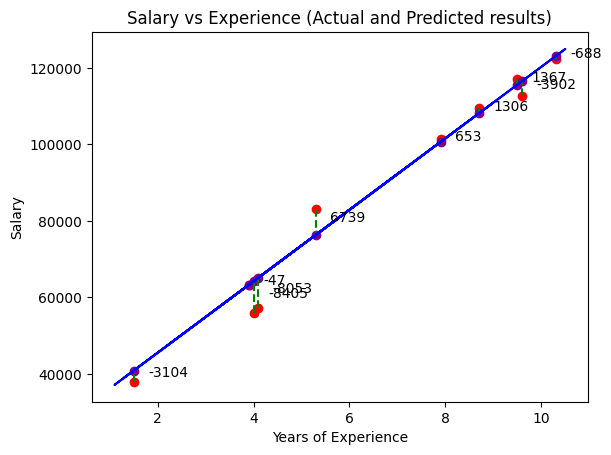

predected_accurately: [[array([10.3]), 688], [array([3.9]), 47], [array([7.9]), 653]]
predected_more: [[array([1.5]), 3104], [array([4.1]), 8053], [array([9.6]), 3902], [array([4.]), 8405]]
predected_less: [[array([9.5]), 1367], [array([8.7]), 1306], [array([5.3]), 6739]]


In [108]:
import math


plt.scatter(X_test, y_test, color='red')
plt.scatter(X_test, y_pred, color='purple')

predected_more = []
predected_less = []
predected_accurately = []

for i in range(len(y_test)):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]],
             color="green", linestyle="--")
    difference = math.floor(y_pred[i] - y_test[i])
    if abs(difference) < 1000:
       predected_accurately.append([X_test[i], abs(difference)])
    elif difference < 0:
        predected_less.append([X_test[i], abs(difference)])
    else:
        predected_more.append([X_test[i], abs(difference)]) 

    plt.text(X_test[i] + .3, y_test[i] + (y_pred[i] - y_test[i])/2, -difference)


plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Actual and Predicted results)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

print("predected_accurately:",predected_accurately)
print("predected_more:",predected_more)
print("predected_less:",predected_less)


## Making a single prediction (for example the salary of an employee with 12 years of experience)

In [109]:
print(regressor.predict([[12]]))

[138967.5015615]


Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 138967.5


**Important note:** Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

In [110]:
print(regressor.predict([[0], [10], [12], [15]]))

[ 26816.19224403 120275.61667525 138967.5015615  167005.32889087]


## Getting the final linear regression equation with the values of the coefficients

In [111]:
print(regressor.coef_)
print(regressor.intercept_)

[9345.94244312]
26816.192244031183


Therefore, the equation of our simple linear regression model is:

$$\textrm{Salary} = 9345.94 \times \textrm{YearsExperience} + 26816.19$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. 

### Practice

In [112]:
def custom_predict(yoe):
    return regressor.coef_[0] * yoe + regressor.intercept_
print(custom_predict(12))

138967.50156149964
